In [7]:
from PIL import Image
import numpy as np
import requests
import cv2

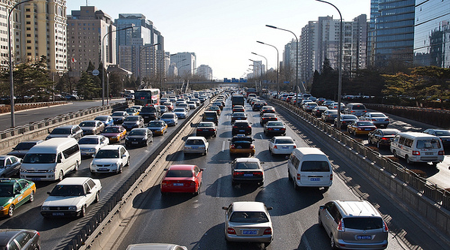

In [43]:
# Get image
image = Image.open(requests.get('https://grist.org/wp-content/uploads/2011/02/china-beijing-cars-500-flickr-remko-tanis.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

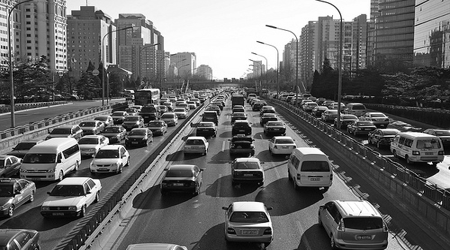

In [44]:
# Turn to grey
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

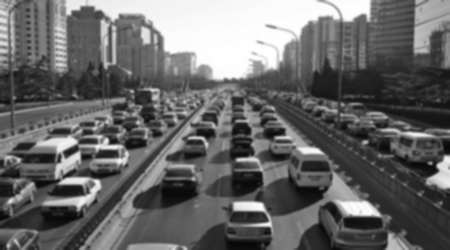

In [45]:
# Blur to remove the noise from the image, Instead of a box filter consisting of equal filter coefficients, a gaussaian kernel is used. 
# It is done with the functions, cv2.GaussainBulr(). We should specift the width and height of the kernel which should be positive and odd.
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

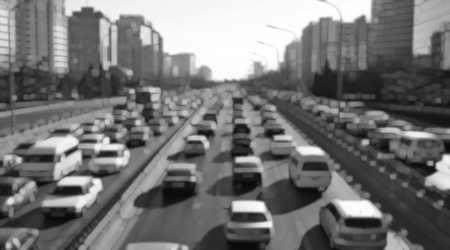

In [46]:
# Dilate image. Opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white
# region in the image or size of foreground object increases

dilated = cv2.dilate(blur, np.ones((3,3)))
Image.fromarray(dilated)

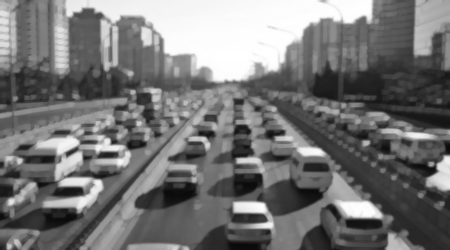

In [47]:
# Performing Morphology transformation with kernel. MorphologyEX is used to find the difference between dilation and erosion of an image. 
# Yo may need eliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). Ypu pass the
# shape and size of the kernel, you get the desired kernel.

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [48]:
# Need car cascade to detect cars. We need to detect multiple objects so we will use detectMultiScale. Detects objects of different sizes 
# in the input image. The detected objects are returned as a list of rectangles.
cars_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(cars_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

12  cars found


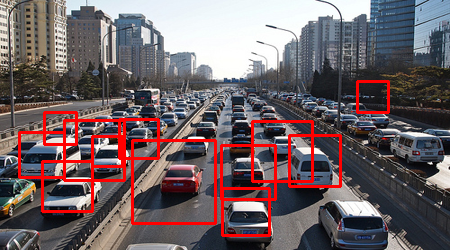

In [49]:
# Use returned contours and draw a rectangle around detected cars. 
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [50]:
# Bus Image

image2 = Image.open(requests.get('https://i0.wp.com/thesource.metro.net/wp-content/uploads/2020/04/MG_7626-scaled.jpg?ssl=1', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2, cv2.COLOR_BGR2GRAY)

In [51]:
# Cascade for detecting
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1  buses found


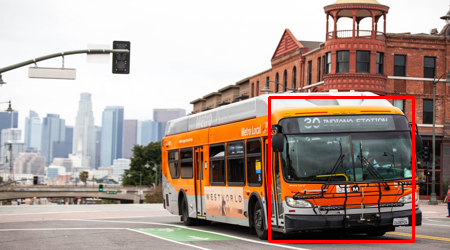

In [52]:
cnt = 0
for (x,y,w,h) in bus:
    cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " buses found")
Image.fromarray(image_arr2)

In [53]:
# Car detection in video
cascade_scr = 'cars.xml'
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_scr)
video = cv2.VideoWriter('result.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))

In [54]:
# Read video Frame by frame
while True:
    ret, img = cap.read()

    if (type(img) == type(None)):
        break

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img)
video.release()